# PLANTILLA MODELIZACIÓN PARA NO SUPERVISADO

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de k a testar
* Reducir el número de repeticiones de n_init

El objetivo de esta plantilla es identificar la configuración del modelo definitivo (algoritmo e hiperparámetros) pero no llegar a este. El modelo definitivo lo entrenaremos con datos reales más adelante, aqui solo lo estamos probando con una muestra.

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [12]:
ruta_proyecto = 'C:/Users/110927/Desktop/EstructuraDirectorio/03_MACHINE_LEARNING/CASOS/00_LeadScoring'

Nombres de los ficheros de datos.

In [13]:
df_tablon = 'df_tablon.pickle'

Cargar los datos.

In [15]:
df=pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + df_tablon)

## MODELIZAR

### Crear el espacio de soluciones

In [6]:
min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [7]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [16]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [17]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,300427664041.52,0.59,19896.18,0.51
4,163694971899.16,0.58,25684.15,0.51
5,107031469280.76,0.56,30094.63,0.51
6,72316030763.62,0.56,36089.74,0.50


#### Analizar los gráficos

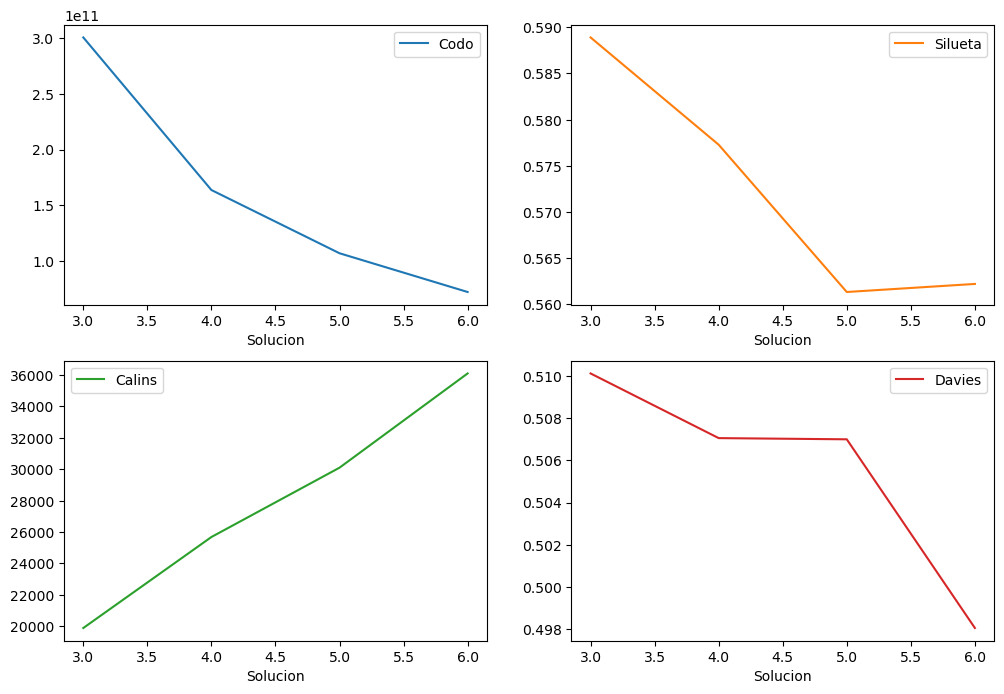

In [18]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

### Segmentación final con la mejor solucion

In [45]:
mejor_solucion = 7

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(train_x)

KMeans(n_clusters=7)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [46]:
train_x['segmento'] = cluster.predict(train_x)

In [47]:
val_x['segmento'] = cluster.predict(val_x)

### Comparar los perfiles

#### Calcular los perfiles

In [85]:
perfiles_train = train_x.groupby('segmento').mean().T.stack().reset_index()
perfiles_train.columns = ['variable','segmento','media']

perfiles_val = val_x.groupby('segmento').mean().T.stack().reset_index()
perfiles_val.columns = ['variable','segmento','media']

#### Comparar los perfiles

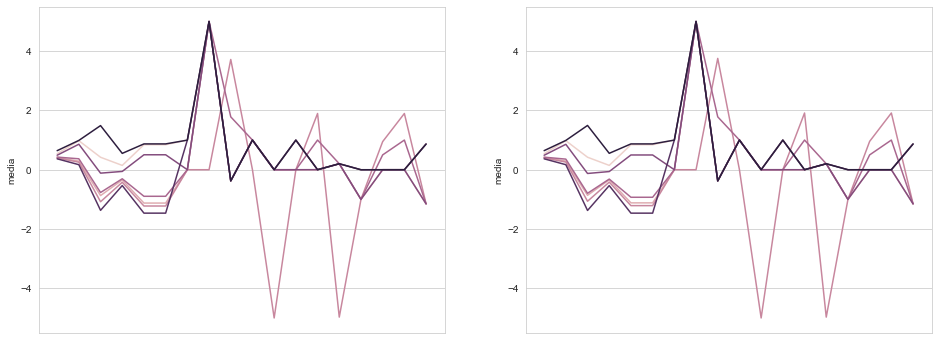

In [88]:
sns.set_style("whitegrid")

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

sns.lineplot(ax = ax[0], data = perfiles_train, x = 'variable', y = 'media', hue = 'segmento')
ax[0].get_legend().remove()
ax[0].axes.xaxis.set_visible(False)

sns.lineplot(ax = ax[1], data = perfiles_val, x = 'variable', y = 'media', hue = 'segmento')
ax[1].get_legend().remove()
ax[1].axes.xaxis.set_visible(False)

## PERFILAR LOS SEGMENTOS

Son segmentos por las caracteristicas de cada variable, euribor de tanto para una edad de tanto, eso es un segmento

Segmentar de forma compleja por valores de cada variable. Ej: entre las edades tal con los ingresos de tal y que me compraron antes de tal con un descuento

In [102]:
train_x.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4,5,6
euribor3m_qt_mms,0.540127,0.415957,0.396024,0.425920,0.488649,0.368144,0.642719
euribor3m_yeo_mms,0.978566,0.288846,0.254058,0.368909,0.859617,0.169744,0.987941
euribor3m_qt_ss,0.420316,-0.872190,-1.079674,-0.768488,-0.115523,-1.369887,1.488214
euribor3m_qt_rs,0.145669,-0.344924,-0.423678,-0.305562,-0.057718,-0.533833,0.551007
euribor3m_yeo_ss,0.843699,-1.124645,-1.223924,-0.896158,0.504240,-1.464542,0.870454
euribor3m_yeo,0.843699,-1.124645,-1.223924,-0.896158,0.504240,-1.464542,0.870454
variacion_tasa_empleo_bin_mms,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.997777
num_dias_ultimo_contacto_disc_ds,5.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000
resultado_campana_anterior_oe_ss,-0.377486,-0.377486,3.718311,1.782710,-0.374617,-0.377486,-0.377486
num_dias_ultimo_contacto_disc_ds_mms,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
